In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

     |████████████████████████████████| 1.7MB 6.6MB/s 
     |████████████████████████████████| 22.3MB 6.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [5]:
def process_data(data):
  pca = PCA(n_components = 2)
  return pca.fit_transform(data)

In [21]:
def plot_dataset(data, target = None):
  fig, ax = plt.subplots(1, figsize = (10, 10))
  ax.scatter(data[:, 0], data[:, 1], c = target, cmap = plt.cm.Set1, edgecolor = 'k')
  plt.xlabel('Признак 1')
  plt.ylabel('Признак 2')
  plt.show()

In [7]:
def execute_data(data, is_KMeans = True):
  ys = []
  clusternums = np.arange(3, 10, 1)
  plt.figure(figsize = (20, 20))
  ax = []
  for clusternum in clusternums:
      i = np.where(clusternums == clusternum)[0][0]
      clf = KMeans(n_clusters = clusternum) if is_KMeans else KMedoids(n_clusters = clusternum)
      ys.append(clf.fit_predict(data))
      ax.append(plt.subplot2grid((4, 2), (int(i / 2), int(i % 2)), colspan = (1 if i < 6 else 2)))
      ax[i].scatter(data[:, 0], data[:, 1], c = ys[i], cmap = plt.cm.Set1, edgecolor = 'k')
      ax[i].set_title('Для ' + str(clusternum) + ' кластеров')
      ax[i].set(xlabel = 'Признак 1', ylabel = 'Признак 2')
  plt.tight_layout()
  plt.show()

In [8]:
def add_noise(data):
  for row in data:
      if(np.random.randint(11) < 3):
          col = np.random.randint(2)
          row[col] += (np.random.randint(-1, 2) * 0.1 * row[col]) 

In [23]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [24]:
X = process_data(X)
# y = target1

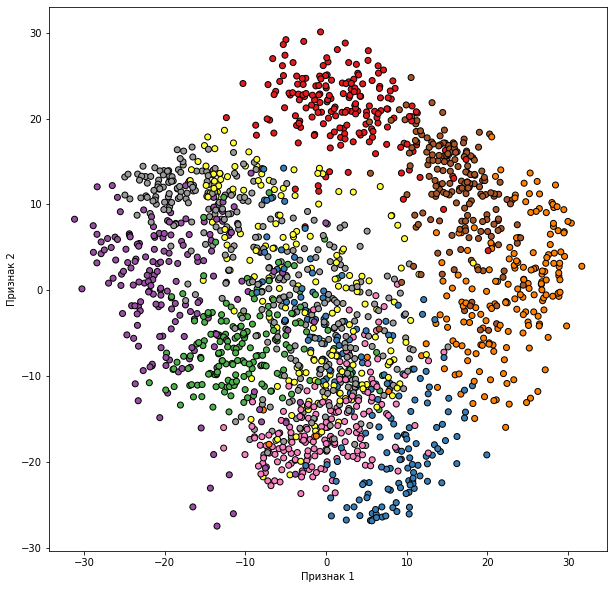

In [25]:
plot_dataset(X, y)

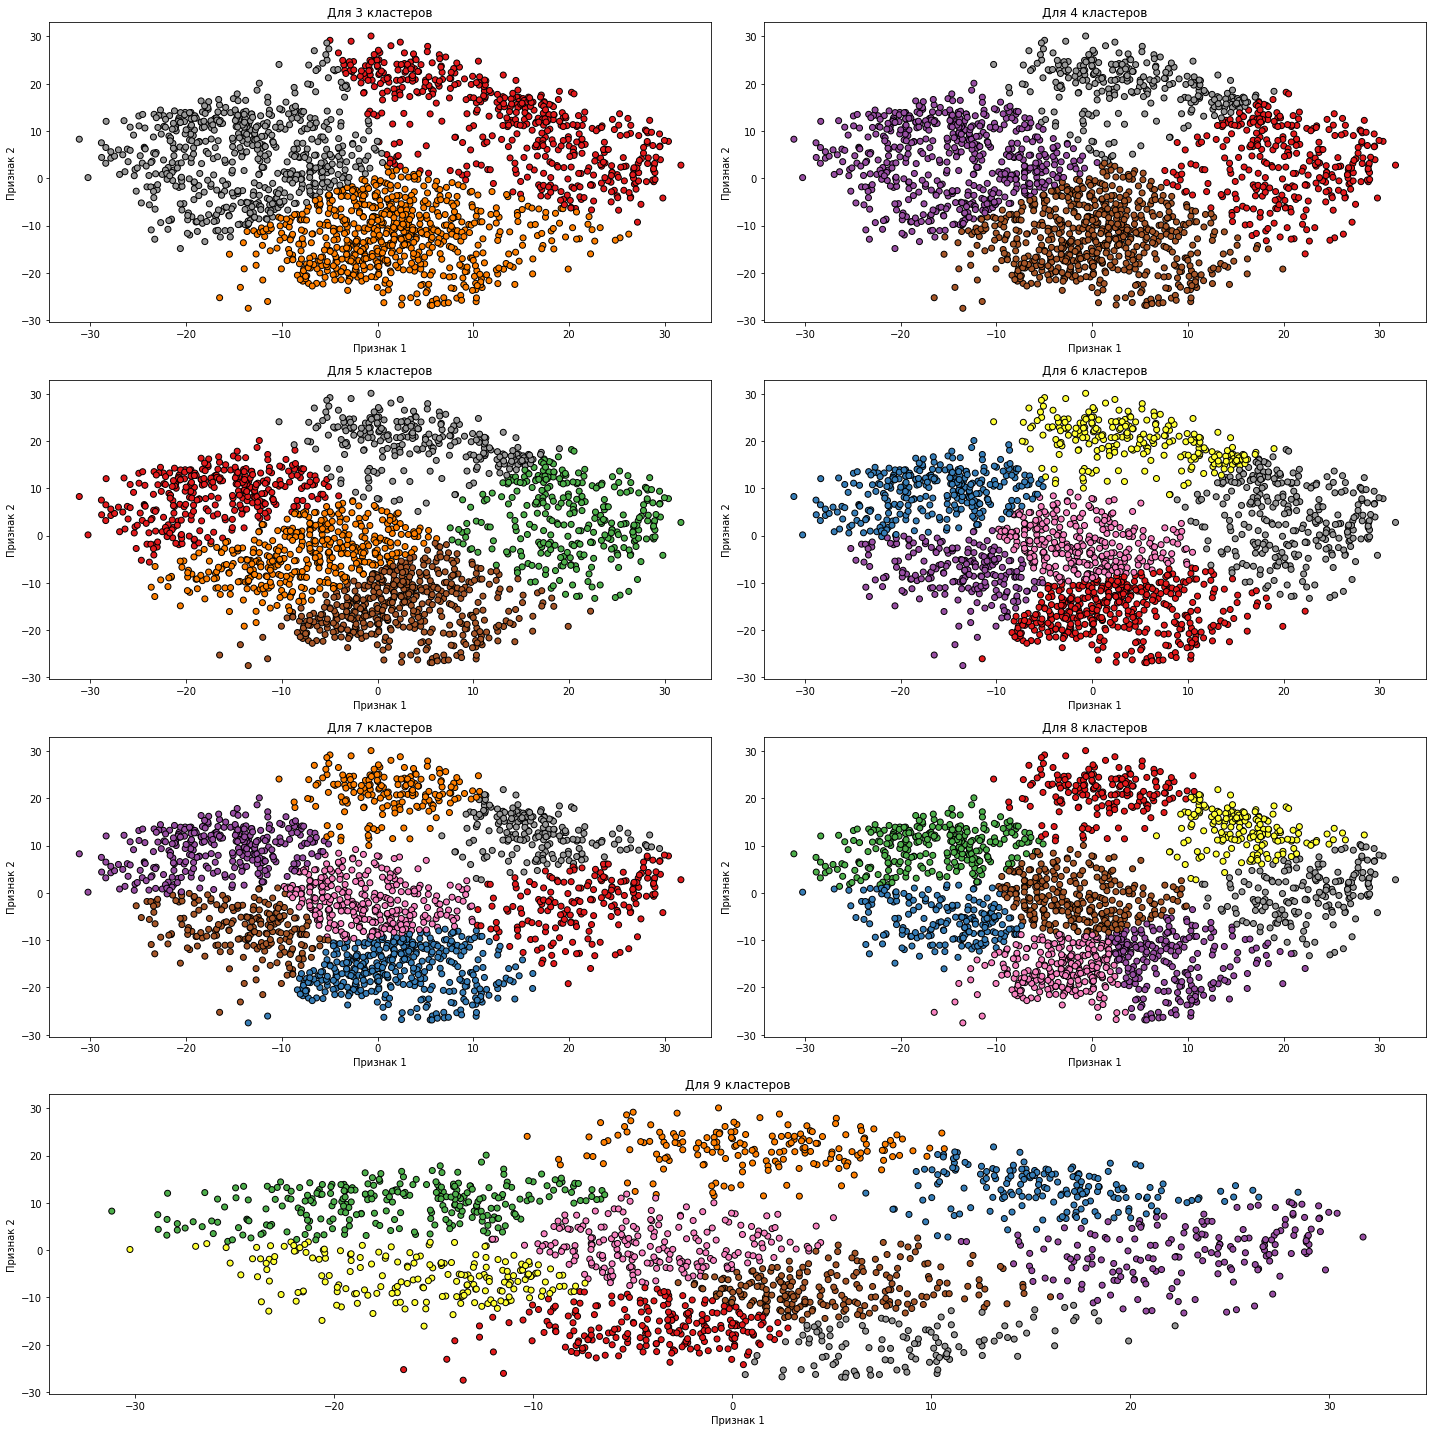

In [12]:
execute_data(X)

In [13]:
add_noise(X)

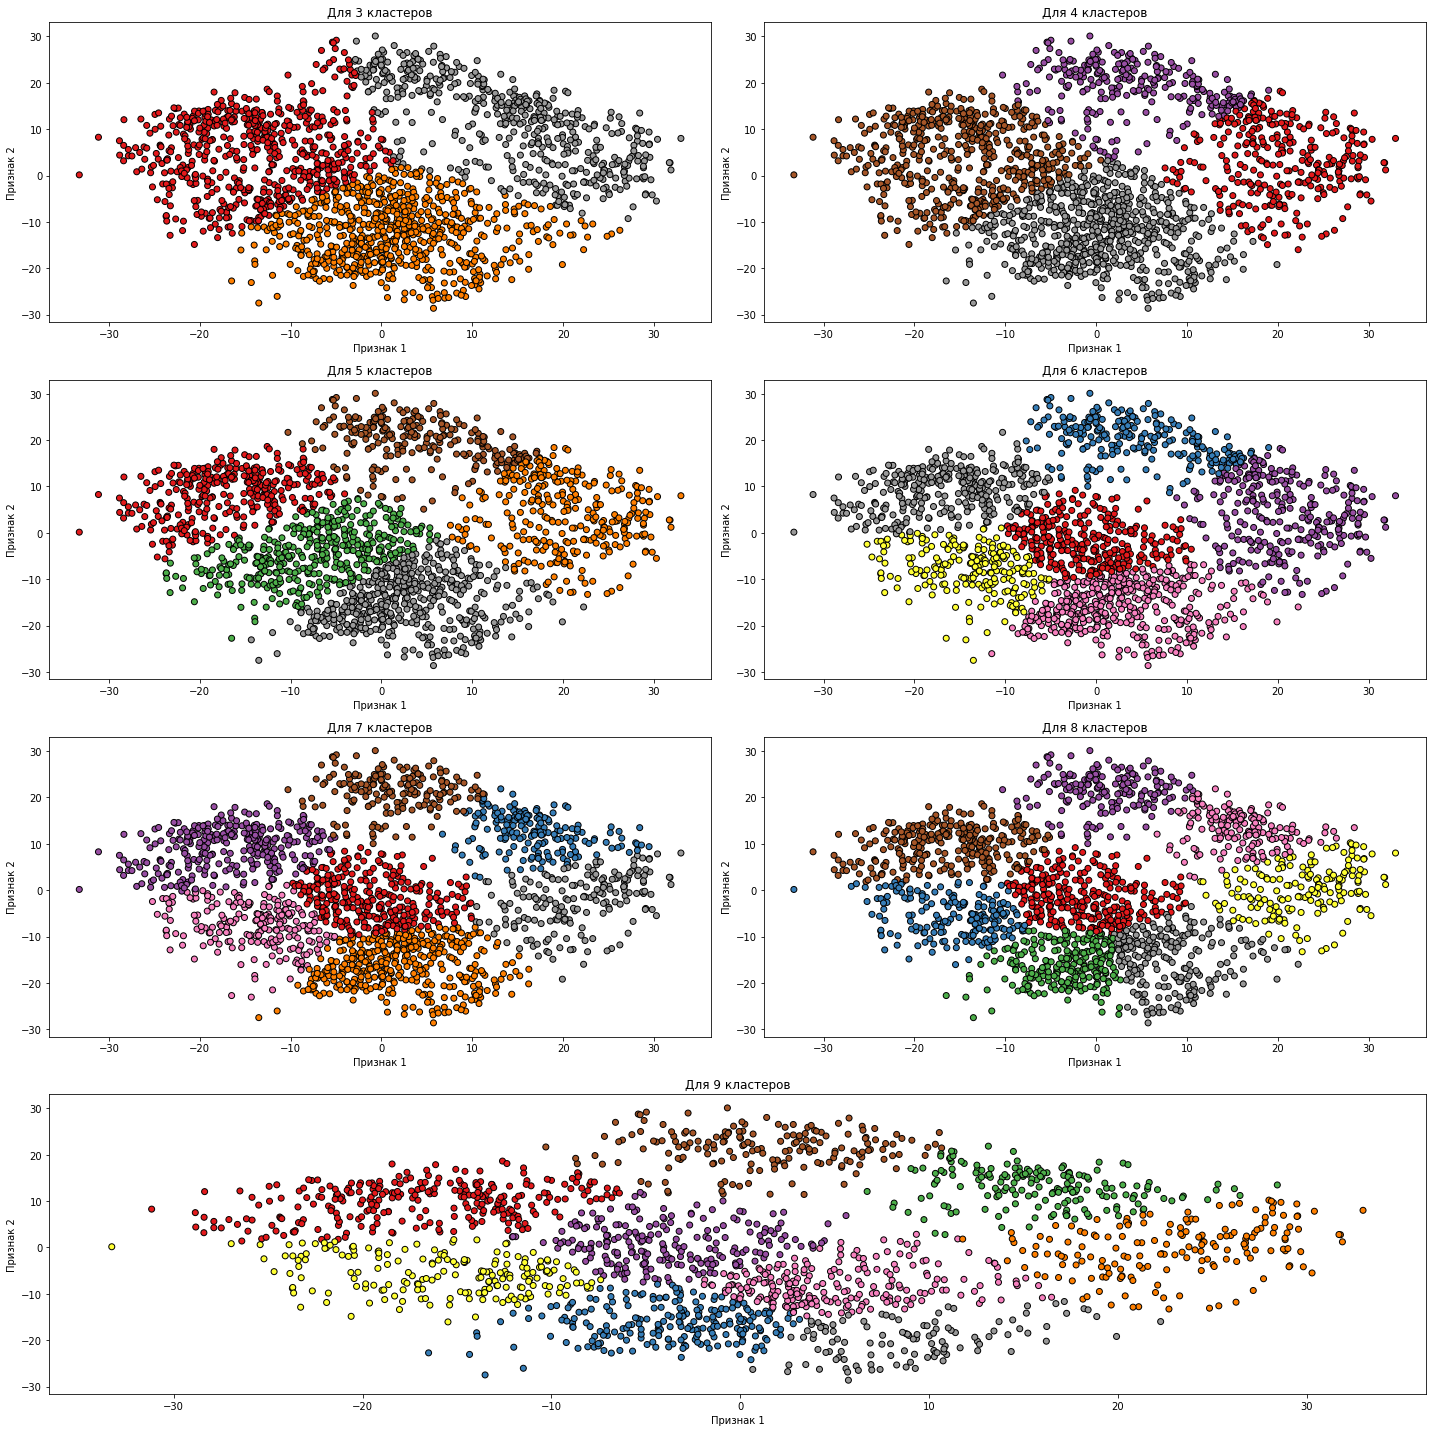

In [14]:
execute_data(X)

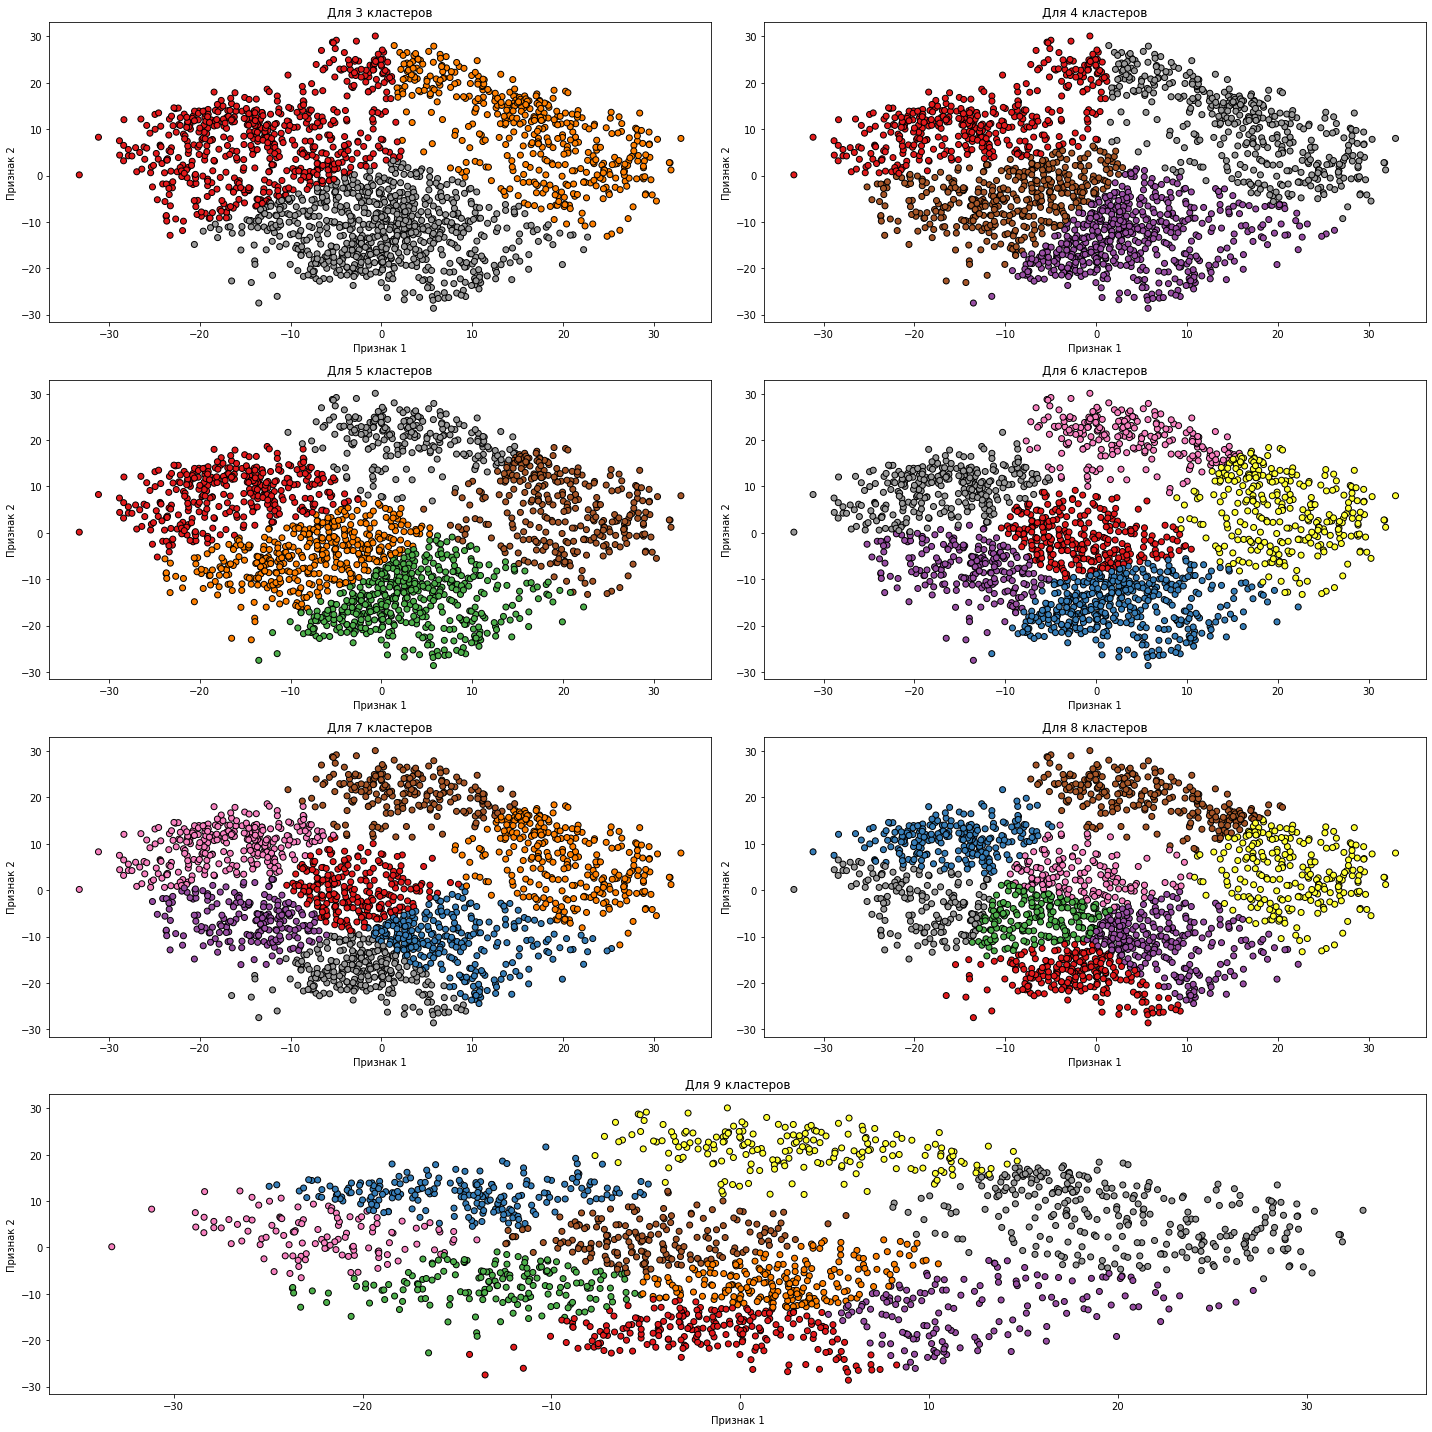

In [15]:
execute_data(X, False)

In [26]:
iris = datasets.load_iris()
#X = iris.data[:, :2] 
X = iris.data
y = iris.target

In [27]:
X = process_data(X)

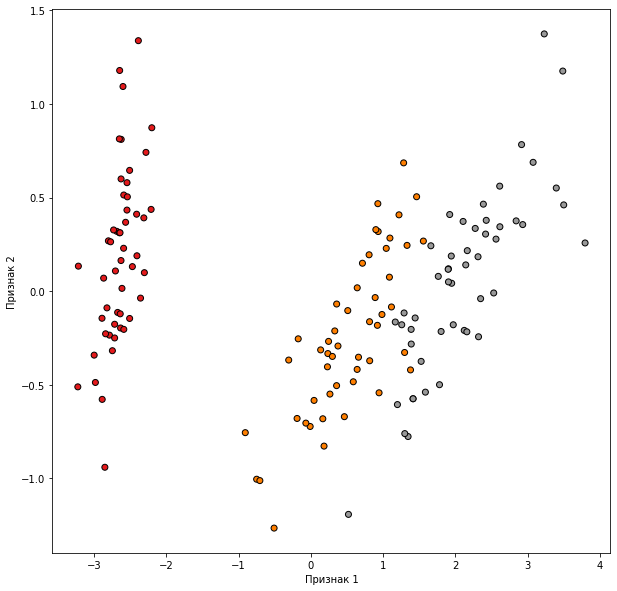

In [28]:
plot_dataset(X, y)

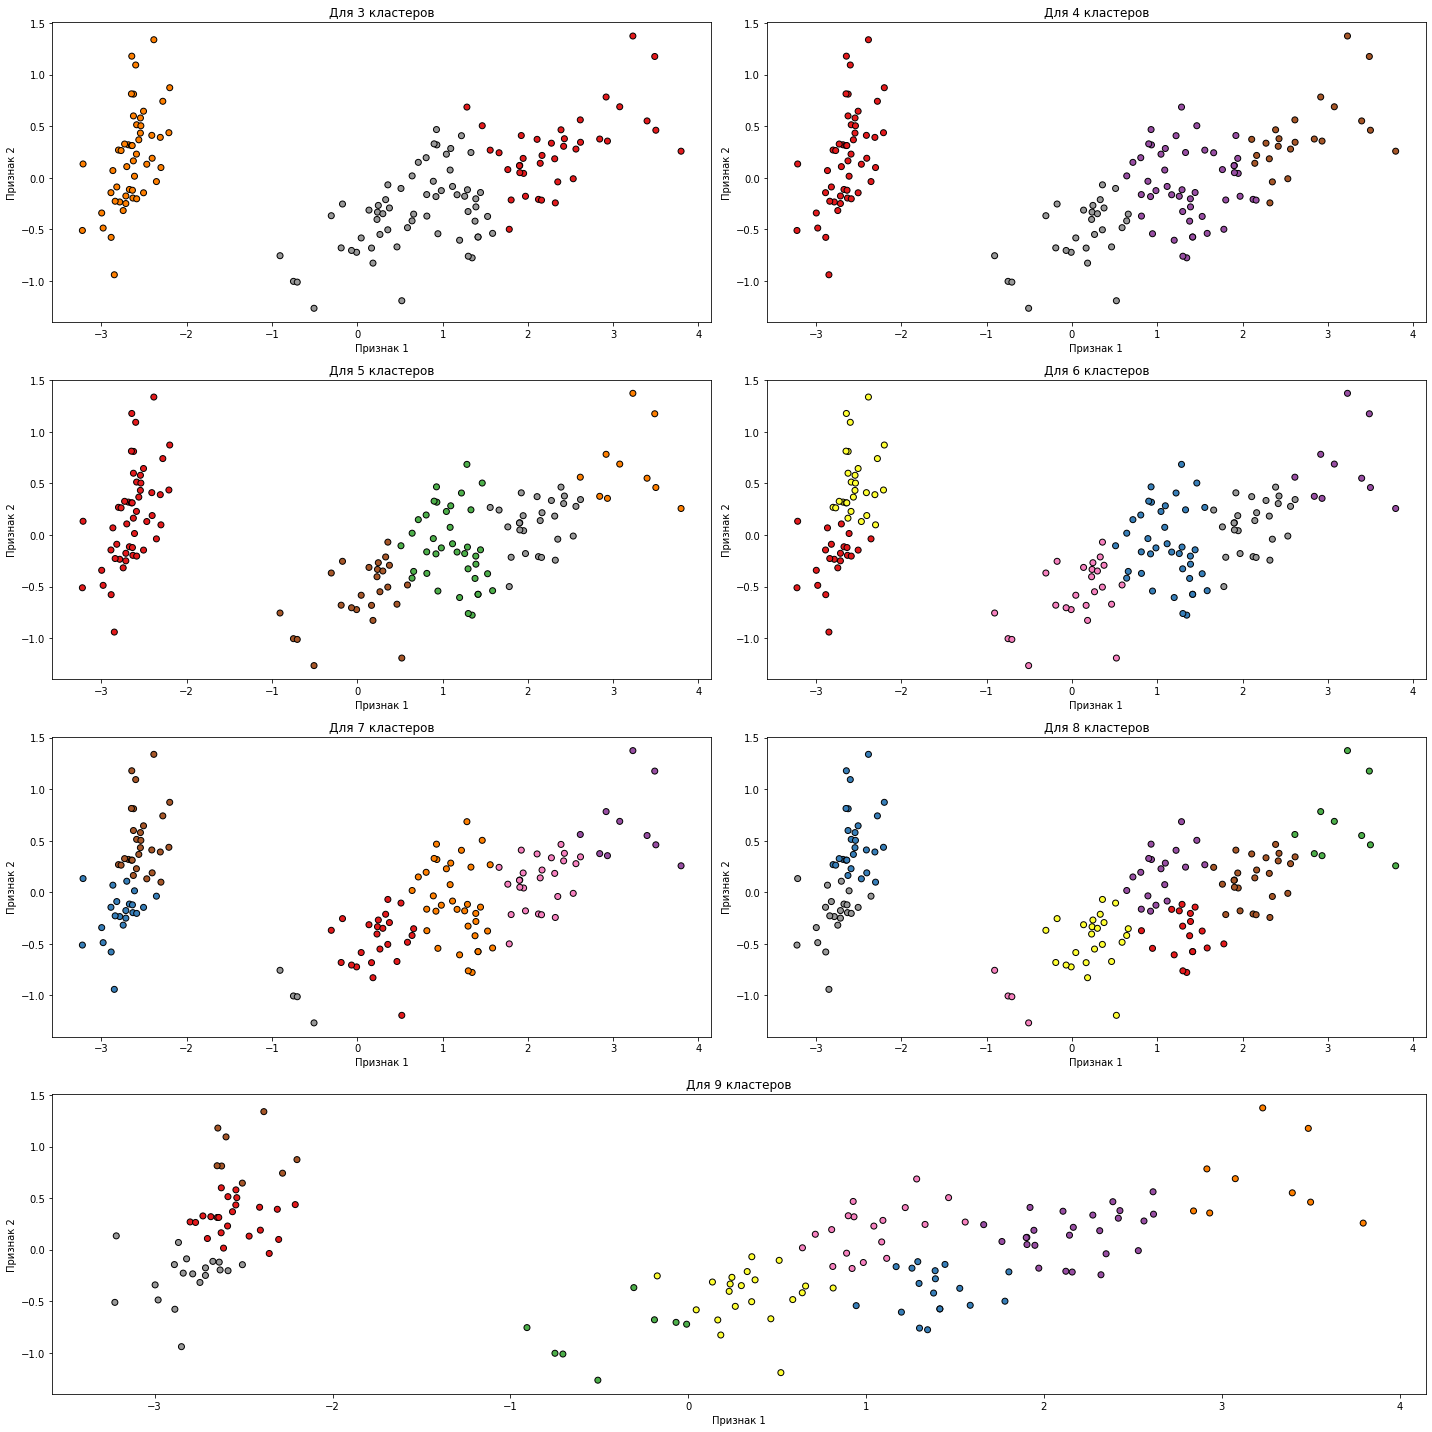

In [19]:
execute_data(X)

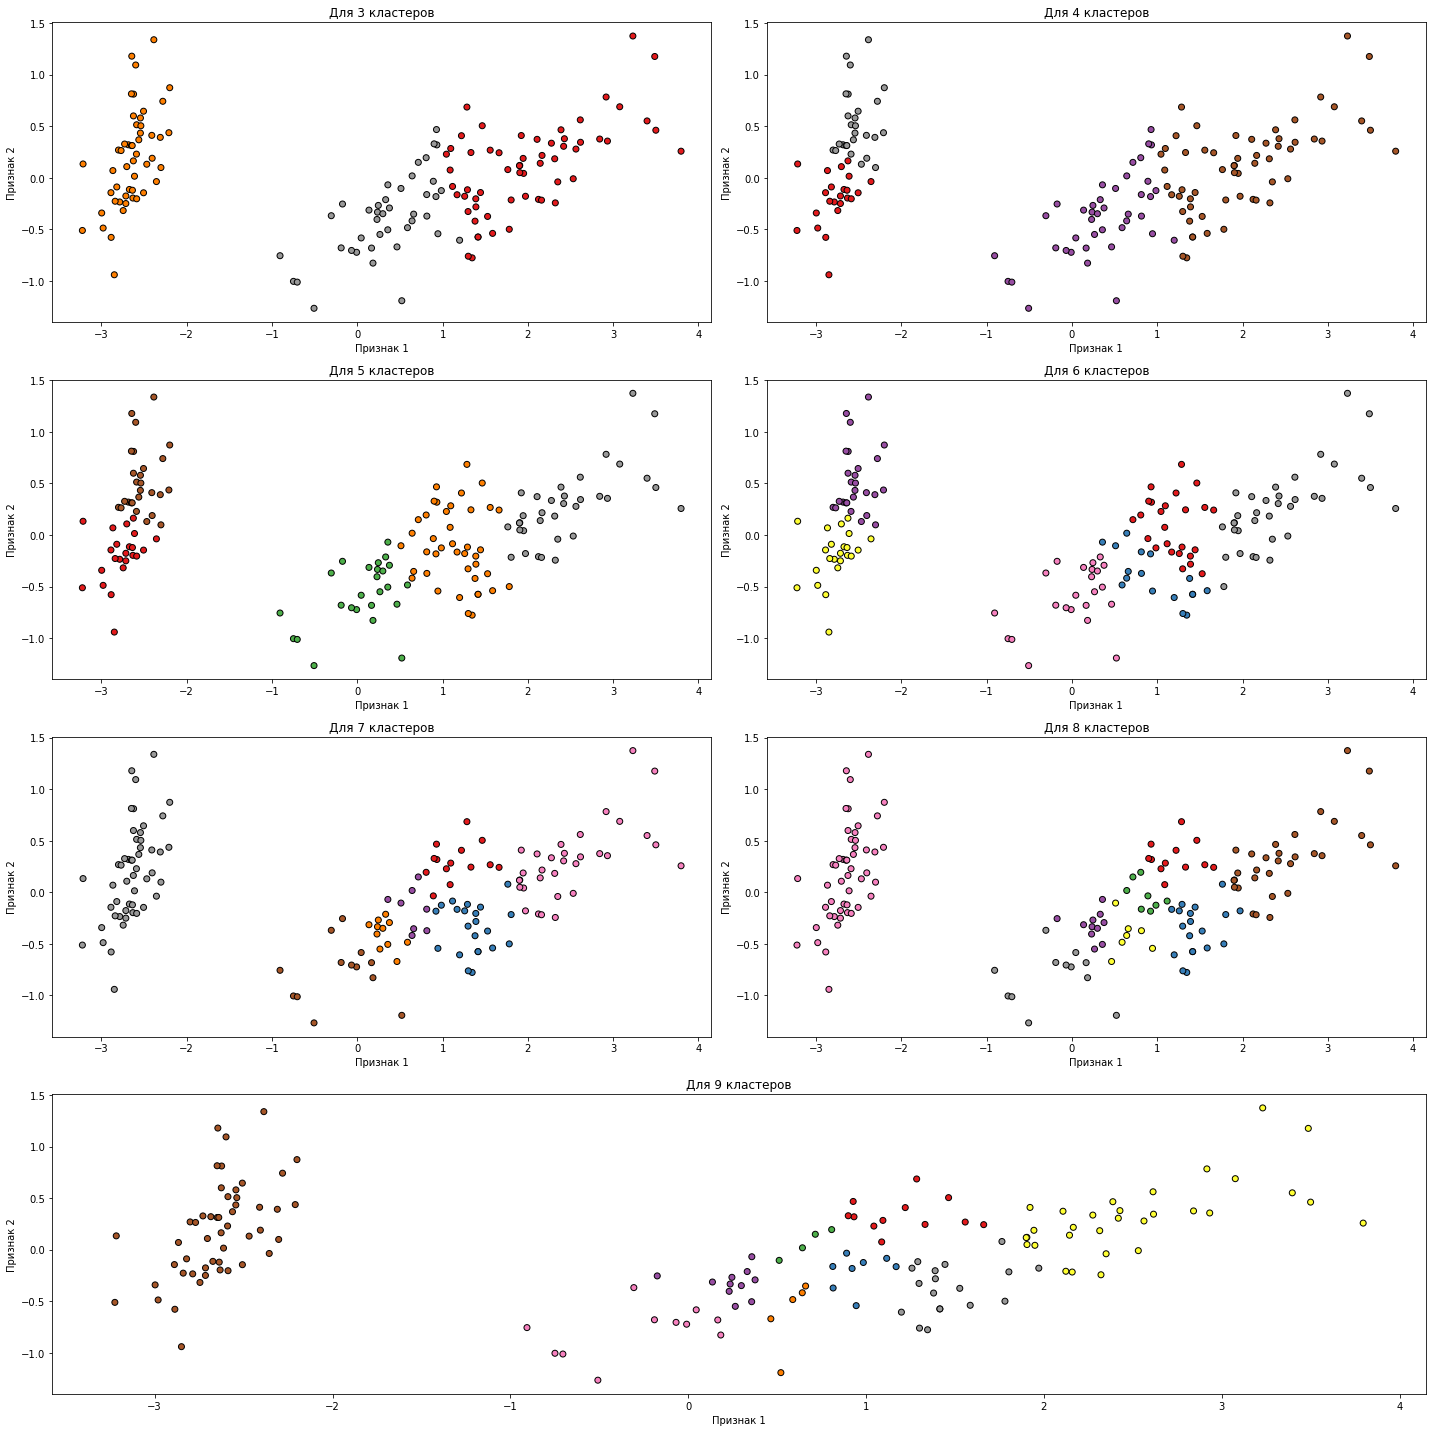

In [20]:
execute_data(X, False)